## Task 3 - Forest Cover Type Classification

### 1. Import Required Libraries

In [ ]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay 

### 2. Read the Dataset

In [2]:
data_path = r'./covtype.csv'
df = pd.read_csv(data_path)

In [3]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


### 🌲 Covtype Dataset - Description

#### 🧾 Features Overview

- **Topographic Features** (Continuous):
  - `Elevation`: Height above sea level (in meters).
  - `Aspect`: Compass direction that a slope faces (in degrees).
  - `Slope`: Steepness of the terrain (in degrees).
  - `Hillshade_9am/Noon/3pm`: Amount of sunlight at different times of day.
  - `Horizontal/Vertical_Distance_To_Hydrology`: Distance to water sources.
  - `Horizontal_Distance_To_Roadways` and `Fire_Points`: Proximity to roads and fire points.

- **Wilderness Area** (Binary):
  - 4 columns like `Wilderness_Area1`, ..., `Wilderness_Area4`, indicating presence in one of 4 designated wilderness areas.

- **Soil Types** (Binary):
  - 40 columns (`Soil_Type1` to `Soil_Type40`), each representing a unique soil classification.

- **Target Column**:
  - `Cover_Type`: Categorical label (1–7) representing forest cover types such as **Spruce/Fir**, **Lodgepole Pine**, etc.


### 3. Analyze the Data

### 3.1 Info.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

### 3.2 Describe

In [5]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


### 3.3 Target

In [6]:
df['Cover_Type']

0         5
1         5
2         2
3         2
4         5
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: Cover_Type, Length: 581012, dtype: int64

### 3.4 Visualization

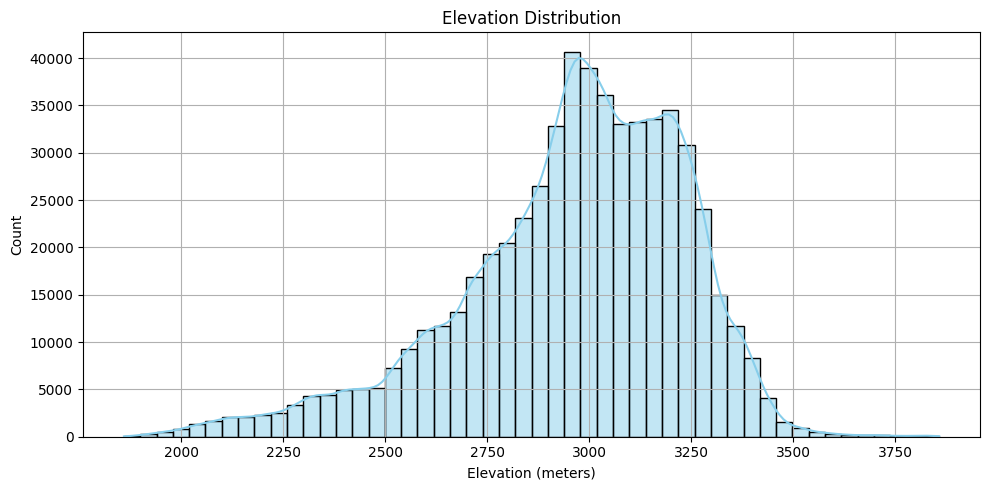

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Elevation', bins=50, kde=True, color='skyblue')
plt.title('Elevation Distribution')
plt.xlabel('Elevation (meters)')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\moham\AppData\Local\Temp\ipykernel_32644\1710671700.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cover_Type', y='Elevation', palette='Set2')


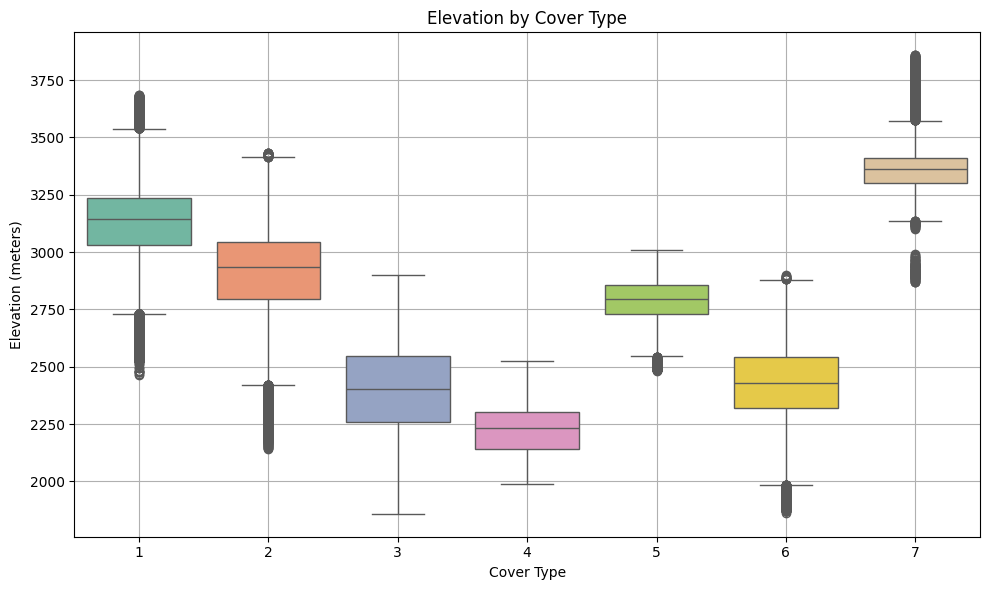

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Cover_Type', y='Elevation', palette='Set2')
plt.title('Elevation by Cover Type')
plt.xlabel('Cover Type')
plt.ylabel('Elevation (meters)')
plt.grid(True)
plt.tight_layout()
plt.show()


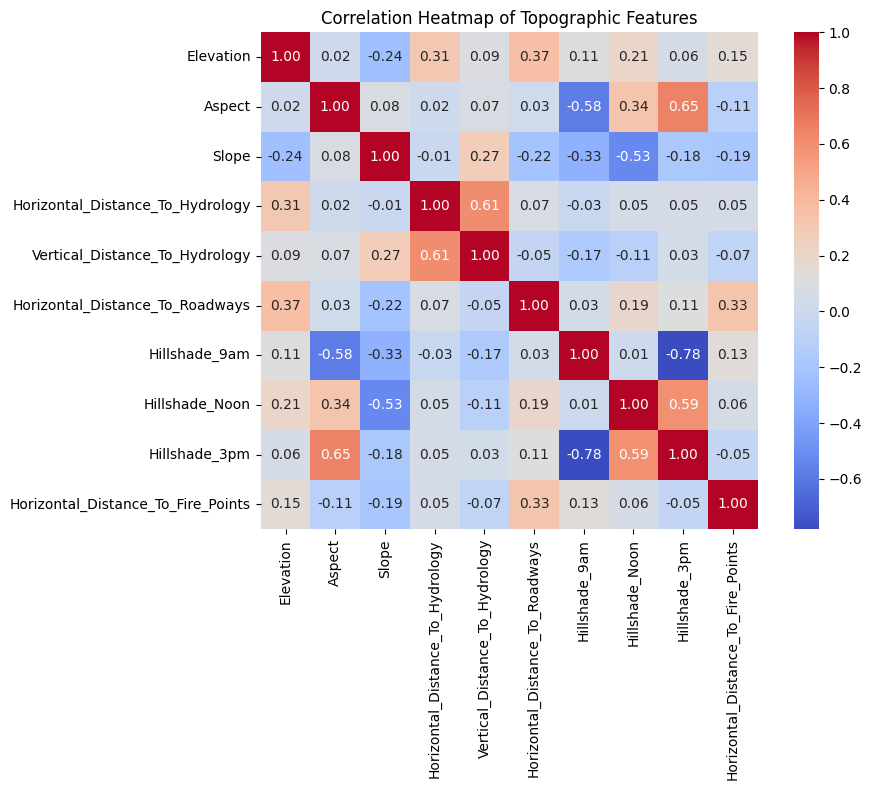

In [9]:
topo_cols = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

plt.figure(figsize=(10, 8))
corr_matrix = df[topo_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Topographic Features')
plt.tight_layout()
plt.show()

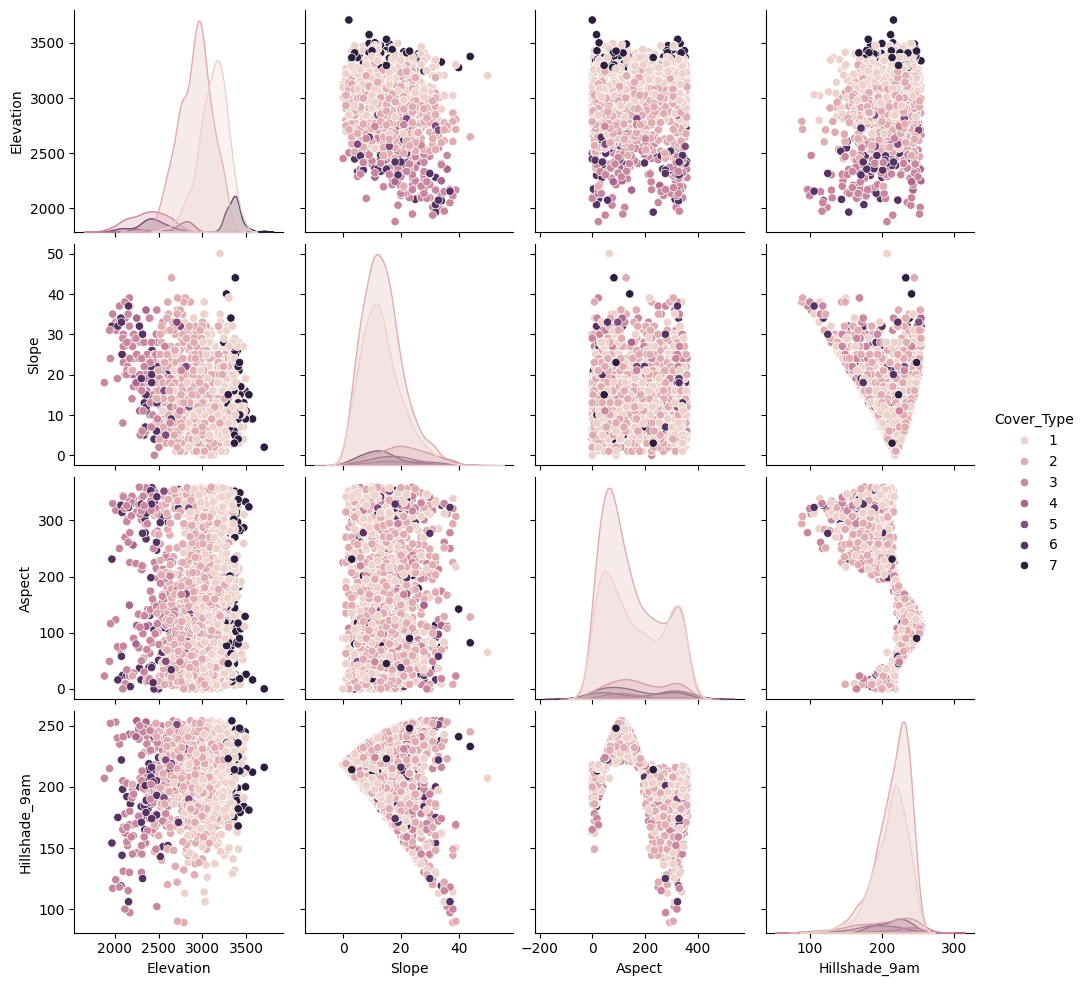

In [10]:
sns.pairplot(df.sample(2000)[['Elevation', 'Slope', 'Aspect', 'Hillshade_9am', 'Cover_Type']], hue='Cover_Type')

C:\Users\moham\AppData\Local\Temp\ipykernel_32644\418725797.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Cover_Type', palette='Set1')


<Axes: xlabel='Cover_Type', ylabel='count'>

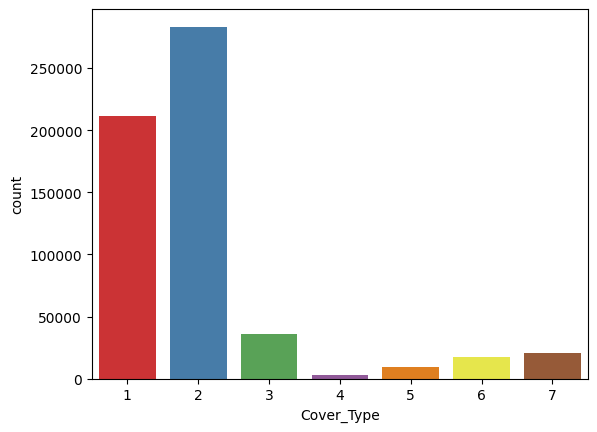

In [11]:
sns.countplot(data=df, x='Cover_Type', palette='Set1')

C:\Users\moham\AppData\Local\Temp\ipykernel_32644\2835788435.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Cover_Type', y='Slope', palette='coolwarm')


<Axes: xlabel='Cover_Type', ylabel='Slope'>

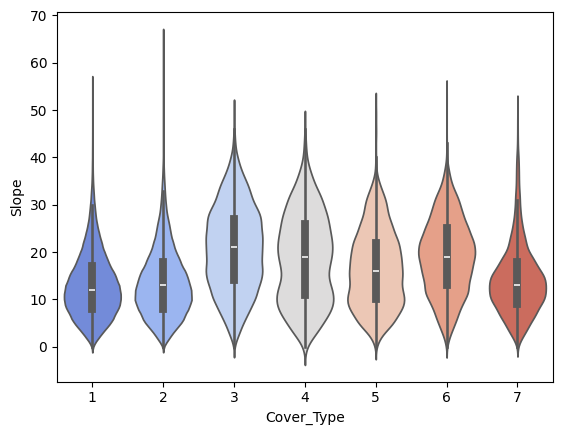

In [12]:
sns.violinplot(data=df, x='Cover_Type', y='Slope', palette='coolwarm')

### 4. Data Preprocessing

### 4.1 Show Columns

In [14]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

### 4.2 Check Missing Values

In [15]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


### 4.3 Check Duplication

In [16]:
df.duplicated().sum()

np.int64(0)

### 5. Split Data into Features and Target

In [17]:
X = df.drop(columns=['Cover_Type'])
y = df['Cover_Type']

In [18]:
X

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,0
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,0
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,0
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,0


In [19]:
y

0         5
1         5
2         2
3         2
4         5
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: Cover_Type, Length: 581012, dtype: int64

### 6. Split Data into Train and Test Sets

In [20]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [21]:
X_train

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
519924,3289,22,19,240,93,1708,205,196,122,2598,...,0,0,1,0,0,0,0,0,0,0
318451,2963,21,18,134,27,1243,206,200,127,1140,...,0,0,0,0,0,0,0,0,0,0
22325,3037,185,9,127,10,6462,222,246,158,3037,...,0,0,0,0,0,0,0,0,0,0
449376,3113,203,13,190,22,2125,213,251,171,730,...,0,1,0,0,0,0,0,0,0,0
482753,3128,346,9,120,36,552,203,226,161,924,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,3182,70,13,362,40,2992,234,214,109,4336,...,0,0,0,0,0,0,0,0,0,0
259178,3172,156,29,716,291,1154,237,228,98,2837,...,0,0,0,0,0,0,0,0,0,0
365838,3153,287,17,335,41,1298,171,237,205,2045,...,0,1,0,0,0,0,0,0,0,0
131932,3065,348,21,124,19,4725,177,202,159,624,...,0,0,0,0,0,0,0,0,0,0


In [22]:
print("x_train shape = ", X_train.shape)
print("y_train shape = ", y_train.shape)
print("x_test shape = ", X_test.shape)
print("y_test shape = ", y_test.shape)

x_train shape =  (464809, 54)
y_train shape =  (464809,)
x_test shape =  (116203, 54)
y_test shape =  (116203,)


### 7. Modeling

### 7.1 Scalling Data

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 7.2 Decision Tree 

In [ ]:
tree1 = DecisionTreeClassifier()
params = {
    'criterion': ['gini'],              
    'max_depth': [20, 25, 30],           
    'min_samples_split': [10, 20],      
    'min_samples_leaf': [5, 10],      
    'max_features': ['sqrt', 'log2']     
}

In [25]:
grid_tree_model = GridSearchCV(tree1,params)

In [ ]:
grid_tree_model.fit(X_train,y_train)

: 

In [ ]:
y_pred_tree = grid_tree_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80        74
           1       0.88      0.83      0.86       111

    accuracy                           0.83       185
   macro avg       0.83      0.83      0.83       185
weighted avg       0.84      0.83      0.83       185



<Axes: >

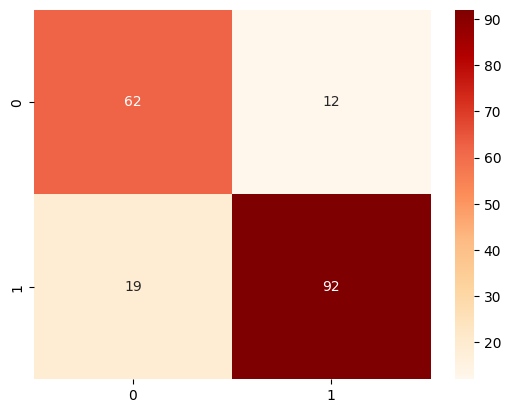

In [ ]:
matrix = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(matrix, annot=True, fmt='d',cmap='OrRd', cbar=True)

### 7.3 RandomForst

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 150],        
    'max_depth': [15, 20, None],        
    'min_samples_split': [5, 10],      
    'min_samples_leaf': [2, 4],         
    'max_features': ['sqrt']             
}

In [ ]:
rf_grid_model = GridSearchCV(
    rf_model,
    param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2
)

In [ ]:
rf_grid_model.fit(X_train,y_train)

In [ ]:
y_pred_rf = rf_grid_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_rf))

In [ ]:
matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(matrix, annot=True, fmt='d',cmap='OrRd',cbar=True)

### 8. Compare performance

In [ ]:
cm1 = confusion_matrix(y_test, y_pred_tree)
cm2 = confusion_matrix(y_test, y_pred_rf)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot(ax=axes[0], cmap=plt.cm.OrRd, colorbar=False)
axes[0].set_title('Confusion Matrix - Model 1')

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot(ax=axes[1], cmap=plt.cm.OrRd, colorbar=False)
axes[1].set_title('Confusion Matrix - Model 2')

plt.tight_layout()
plt.show()
